In [114]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest as ztest
from sklearn.metrics import r2_score as R2S
import cairo

## Names and Palette ##

In [115]:
today = date.today()
print("Today's date:", today)
date = str(today)
date

Today's date: 2024-05-23


'2024-05-23'

In [116]:
tubulin = '[Tubulin] (' r'$\mu$' 'M)'
tub = 'tub'

DCXconc = '[DCX] (nM)' 
EBconc = '[EB] (nM)'
DCX = 'DCX'
Type = 'DCX Type'

Concentration = 'Concentration (' r'$\mu$' 'M)'
Length = 'Length (' r'$\mu$' 'm)'
Lifetime = 'Lifetime (min)'
GrowthRate = 'Growth Rate (' r'$\mu$' 'm/min)'
TimeToNucleate = 'Time to Nucleate (min)'
ShrinkageLength = 'Shrink Length (' r'$\mu$' 'm)'
ShrinkageLifetime = 'Shrink Lifetime (min)'
ShrinkageRate = 'Shrink Rate (' r'$\mu$' 'm/min)'
RescuePerLength = 'Rescues (' r'$\mu$' 'm' r'$^{-1}$' ')'

In [117]:
Type_order = ['None', 'Y64N','R76S','R102S', 'R178L', 'P191R', 'G223E','R303X', 'WT']

category_Type = CategoricalDtype(Type_order, ordered=True,) #order mutants

In [118]:
grey00 = '#777777'
grey20 = '#C5C5C5'
cyan00 = '#0089CF'  
cyan20 = '#65CBFF'
pink00 = '#e468b8'
pink20 = '#FBB0E1'
orange00 = '#ff8341'
orange20 = '#FFC6A8'


In [119]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))
print(DC1color,DC2color)

palette_all = [grey] + list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]

parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]

[<Color #ab4a9c>, <Color #e468b8>, <Color #ffa4cd>] [<Color #ff5b00>, <Color #ff8341>, <Color #ffac83>]


In [120]:
### font for matplotlib
matplotlib.rcParams['font.family'] = 'Helvetica Neue LT Std'

## Join Data ##

In [27]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [14]:
files = [x for x in path.iterdir() if x.is_file()]
files = [i for i in files if (str(i)[-9:] != 'Sheet.csv') == True]
files = [i for i in files if (str(i)[-3:] == 'csv') == True]
files

[WindowsPath('D:/Sofia/Data_Sheets_summer/CallumAnalysis_2021-04-14.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/CallumAnalysis_2021-04-22.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-03.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-08.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-20.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-21.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-29.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-03.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-12.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-17.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-19.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-25.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-27.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-09-08.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-09-10

In [15]:
data = pd.read_csv(files[0], encoding='utf-8')
for i in range(1,len(files)):
    d = pd.read_csv(files[i], encoding='utf-8')
    data = data.append(d, ignore_index=True)
data[Type].unique()

array(['R102S', 'R303X', 'None', 'WT', 'P191R', 'Y64N', 'R178L', 'G223E',
       'R76S'], dtype=object)

In [16]:

data[Type] = data[Type].astype(category_Type)
data = data.sort_values(by=[Type, DCXconc])
#FIX CONCENTRATION
data[DCXconc] = data[DCXconc].apply(lambda x: round(x*2.27))
np.sort(data[DCXconc].unique())

array([  0,  32,  57,  79, 114, 227], dtype=int64)

In [17]:
data

,Date,Investigator,CH,[Tubulin] $(\mu M)$,[DCX] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues,DCX Type
601,2020-07-03,Sofia,13,12.0,0,3.959000,4.024000,0.983847,0.901208,4.066000,0.083833,48.500994,False,None
602,2020-07-03,Sofia,13,12.0,0,7.490000,7.880333,0.950467,0.146708,7.918000,0.167667,47.224652,False,None
603,2020-07-03,Sofia,13,12.0,0,3.210000,3.521000,0.911673,0.230542,3.424000,0.251500,13.614314,False,None
604,2020-07-03,Sofia,13,12.0,0,12.840000,14.335500,0.895679,0.817375,12.947000,1.089833,11.879798,False,None
605,2020-07-03,Sofia,13,12.0,0,3.424000,3.940167,0.868999,0.649708,3.210000,0.251500,12.763419,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,2021-01-29,Sofia,22,6.0,227,3.729635,6.715666,0.555363,0.605930,0.845384,0.474046,1.783338,True,WT
8940,2021-01-29,Sofia,22,6.0,227,6.115573,10.743261,0.569247,5.305802,1.044122,0.789946,1.321763,True,WT
8941,2021-01-29,Sofia,22,6.0,227,4.376856,8.415779,0.520077,0.645753,1.342899,0.355596,3.776469,True,WT
8942,2021-01-29,Sofia,22,6.0,227,8.121382,16.386184,0.495624,0.530277,4.733321,2.453969,1.928843,True,WT


In [18]:
data.to_csv(path/(date+'_MasterSheet.csv'), encoding='utf-8', index=False)

## Open data if already saved ##

In [8]:
askmastersheet = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
data = pd.read_csv(askmastersheet, encoding='utf-8')
data[Type] = data[Type].fillna('None')
data 

,Date,Investigator,CH,[Tubulin] ($\mu$M),[DCX] (nM),Length ($\mu$m),Lifetime (min),Growth Rate ($\mu$m/min),Time to Nucleate (min),Shrink Length ($\mu$m),Shrink Lifetime (min),Shrink Rate ($\mu$m/min),Rescues,DCX Type
0,2020-07-03,Sofia,13,12,0,3.959000,4.024000,0.983847,0.901208,4.066000,0.083833,48.500994,False,None
1,2020-07-03,Sofia,13,12,0,7.490000,7.880333,0.950467,0.146708,7.918000,0.167667,47.224652,False,None
2,2020-07-03,Sofia,13,12,0,3.210000,3.521000,0.911673,0.230542,3.424000,0.251500,13.614314,False,None
3,2020-07-03,Sofia,13,12,0,12.840000,14.335500,0.895679,0.817375,12.947000,1.089833,11.879798,False,None
4,2020-07-03,Sofia,13,12,0,3.424000,3.940167,0.868999,0.649708,3.210000,0.251500,12.763419,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11303,2021-01-29,Sofia,22,6,227,3.729635,6.715666,0.555363,0.605930,0.845384,0.474046,1.783338,True,WT
11304,2021-01-29,Sofia,22,6,227,6.115573,10.743261,0.569247,5.305802,1.044122,0.789946,1.321763,True,WT
11305,2021-01-29,Sofia,22,6,227,4.376856,8.415779,0.520077,0.645753,1.342899,0.355596,3.776469,True,WT
11306,2021-01-29,Sofia,22,6,227,8.121382,16.386184,0.495624,0.530277,4.733321,2.453969,1.928843,True,WT


In [9]:
pathmastersheet = Path(askmastersheet)
resultdirectory = str(pathmastersheet.parents[0])+'//Plots'
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
path = newmydir
path

WindowsPath('C:/Users/sofia/OneDrive - McGill University/EJCB2023/Sofia_EJCB_Figs/Data/Plots')

In [10]:
data = data.dropna()

## Seaborn plot #

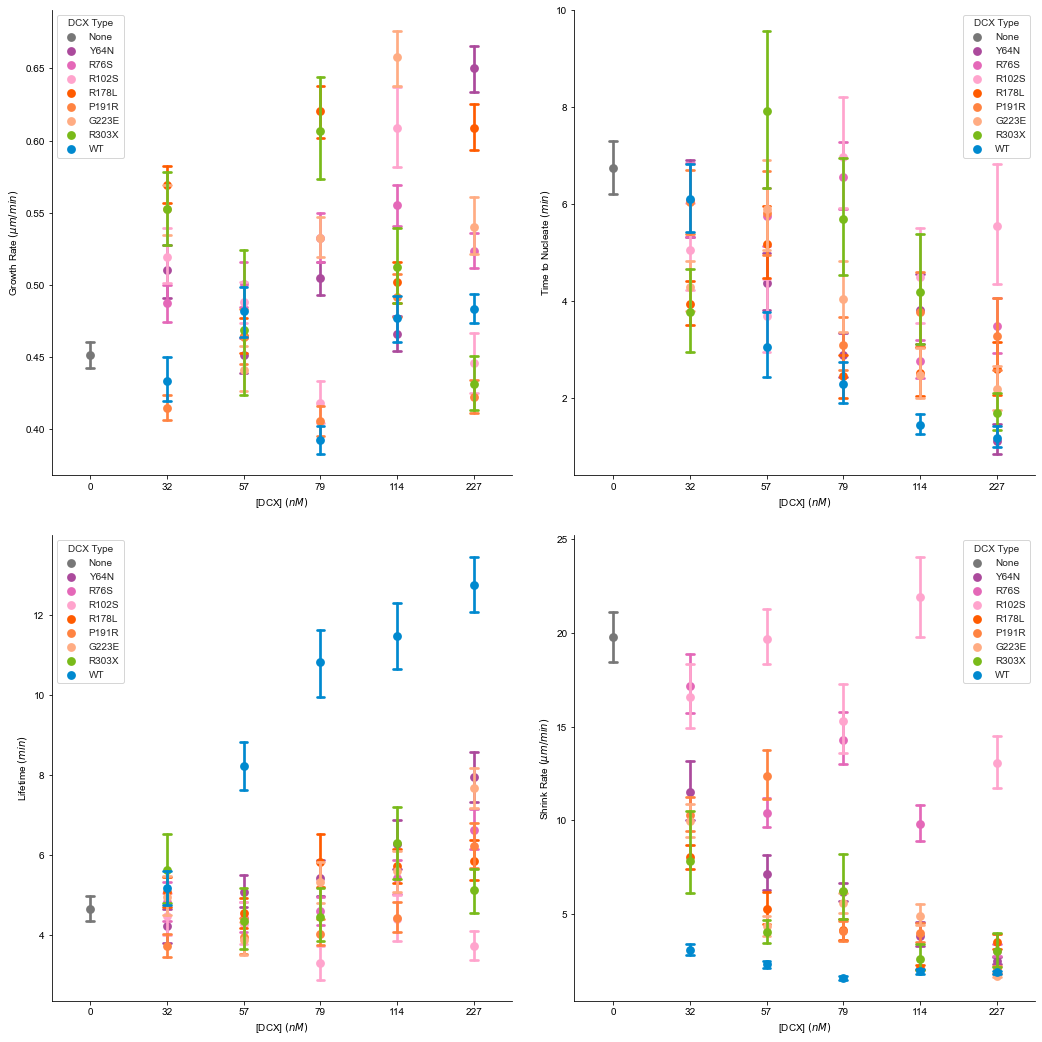

In [11]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x=DCXconc, y=parameters[c],
                        hue=Type, err_style="bars", marker='o', join=False, capsize=.1,
                        data=data[ (data[tubulin]==6)],err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
        
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
#plt.savefig(path/('tub6uM_DCX-variable'+date+'.pdf'))
#plt.savefig(path/('tub6uM_DCX-variable'+date+'.png'))

# Fitting Data #

In [9]:
def gaussian(x, mu, sig):
    return (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) )/(sig*np.sqrt(2*np.pi))

def exponential(x, scale):
    return ((np.exp(-x/scale) )/(scale))

def gamma(x, shape, scale):
    return (np.power(x,shape-1)*np.exp(-x/ scale))/(sp.special.gamma(shape) * np.power(scale,shape))


In [10]:
def make_hist(data, parameter, tubconc, dcxtype, dcxconc) :
    
    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)]
    
    if parameter == GrowthRate :
        maxbin = 1.5
        binsize = 0.05
#     elif parameter == ShrinkageRate :
#         maxbin = 15
#         binsize = 0.1
    else:
        maxbin = 30
        binsize = 1
        
    n, bins, patches = plt.hist(selectdata[parameter], bins=np.arange(0, maxbin + binsize, binsize), density=True);
    plt.clf()
       
    return n, bins

In [11]:
def equation_fit(data, parameter):
    
    if (parameter ==  GrowthRate) | (parameter == ShrinkageRate) :
        equation = gaussian
    elif parameter == TimeToNucleate :
        equation = exponential
    elif parameter == Lifetime :
        equation = gamma
        
    results = pd.DataFrame(columns=[] , index=[])
    
    for tubconc in data[tubulin].unique():
        for dcxtype in data[Type].unique():
            for dcxconc in data[DCXconc].unique():

                    n, bins =  make_hist(data, parameter, tubconc, dcxtype, dcxconc)      

                    if np.isnan(np.sum(n)) == True:
                        continue

                    if equation == gamma :
                        coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n,[2,1])
                    else :
                        coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n)

                    variance = np.diagonal(var_matrix) #Refer [3]
                    SE = np.sqrt(variance) #Refer [4]

                #======Making a data frame========
                    results0 = pd.DataFrame(columns=[] , index=[])
                    
                    for k in np.arange(0,len(coeff)):
                        
                        r0 = pd.DataFrame([[coeff[k],SE[k]],],columns=['Fit', 'SE'])
                        r0['Coefficient'] = k
                        results0 = pd.concat([results0, r0], sort=False)
                        
#                     for k in np.arange(0,len(coeff)):
#                         header = [np.array([parameter]),np.array(['Coefficient '+ str(k)])]
#                         r0 = pd.DataFrame([coeff[k],SE[k]], index=(['Value','SE']),columns= header)
#                         results0 = pd.concat([results0, r0], axis=1, sort=False)

                    results0[tubulin] = tubconc
                    results0[Type] = dcxtype
                    results0[DCXconc] = dcxconc
                    results0['Parameter'] = parameter

                    results = pd.concat([results, results0], sort=False)

    return results

In [20]:
newmydir = path/(date+'_fitdata')
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('C:/Users/Brouhard Lab/OneDrive - McGill University/EJCB2023/Sofia_EJCB_Figs/Data/Plots/2023-10-24_fitdata')

In [69]:
GrowthRateFit = equation_fit(data, GrowthRate);
TimeToNucleateFit = equation_fit(data, TimeToNucleate);
LifetimeFit = equation_fit(data, Lifetime);
ShrinkageRateFit = equation_fit(data, ShrinkageRate);

C:\Users\Brouhard Lab\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  


<Figure size 432x288 with 0 Axes>

In [70]:
GrowthRateFit['Moment'] = GrowthRateFit['Coefficient'].apply(lambda x: 'Mean' if x == 0 else 'Std')
TimeToNucleateFit['Moment'] = 'Mean'
ShrinkageRateFit['Moment'] = ShrinkageRateFit['Coefficient'].apply(lambda x: 'Mean' if x == 0 else 'Std')

In [71]:
GrowthRateFit

,Fit,SE,Coefficient,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,Parameter,Moment
0,1.070577,0.008903,0,12.0,None,0,Growth Rate $(\mu m / min)$,Mean
0,0.157043,0.007290,1,12.0,None,0,Growth Rate $(\mu m / min)$,Std
0,0.797346,0.025314,0,8.0,None,0,Growth Rate $(\mu m / min)$,Mean
0,0.149149,0.020669,1,8.0,None,0,Growth Rate $(\mu m / min)$,Std
0,0.416686,0.002427,0,6.0,None,0,Growth Rate $(\mu m / min)$,Mean
...,...,...,...,...,...,...,...,...
0,0.163013,0.006376,1,14.0,None,0,Growth Rate $(\mu m / min)$,Std
0,0.692366,0.069855,0,10.0,None,0,Growth Rate $(\mu m / min)$,Mean
0,0.304453,0.057563,1,10.0,None,0,Growth Rate $(\mu m / min)$,Std
0,0.434849,0.012454,0,7.0,None,0,Growth Rate $(\mu m / min)$,Mean


In [72]:
LifetimeCoeff0 = LifetimeFit[(LifetimeFit['Coefficient']==0)]['Fit'].values
LifetimeCoeff1 = LifetimeFit[(LifetimeFit['Coefficient']==1)]['Fit'].values
LifetimeSE0 = LifetimeFit[(LifetimeFit['Coefficient']==0)]['SE'].values
LifetimeSE1 = LifetimeFit[(LifetimeFit['Coefficient']==1)]['SE'].values
LifetimeMean = LifetimeCoeff0*LifetimeCoeff1
LifetimeSE = np.sqrt(np.square(LifetimeCoeff0*LifetimeSE1) + np.square(LifetimeCoeff1*LifetimeSE0))
LifetimeSE

array([2.43676596, 1.4355256 , 0.64736929, 0.62574452, 0.45746064,
       0.67508995, 0.97846511, 0.96344522, 0.37972168, 0.33389647,
       0.4230166 , 0.46989284, 0.84098263, 0.56379324, 0.71990748,
       0.43251922, 0.54352904, 0.26249001, 0.58698115, 0.4712886 ,
       0.79081411, 0.53577392, 0.53245799, 0.57845744, 0.42107693,
       0.36789313, 0.50790211, 1.18293503, 0.91936214, 0.76119686,
       0.66095196, 0.56818905, 1.0367249 , 1.14834299, 0.86204476,
       1.28425131, 1.4852557 , 1.04880977, 0.83853427, 1.35359924,
       2.39104898, 1.96323867, 2.28570103, 1.83880752, 1.05462012,
       1.11765507])

In [73]:
LTmeandf = LifetimeFit[(LifetimeFit['Coefficient']==0)]
LTmeandf['Fit'] = LifetimeMean
LTmeandf['SE'] = LifetimeSE
LTmeandf['Coefficient'] = np.NaN
LTmeandf['Moment'] = 'Mean'
LTmeandf

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,Fit,SE,Coefficient,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,Parameter,Moment
0,8.553119,2.436766,NaN,12.0,None,0,Lifetime $(min)$,Mean
0,4.686031,1.435526,NaN,8.0,None,0,Lifetime $(min)$,Mean
0,3.846022,0.647369,NaN,6.0,None,0,Lifetime $(min)$,Mean
0,3.560357,0.625745,NaN,6.0,Y64N,32,Lifetime $(min)$,Mean
0,4.796899,0.457461,NaN,6.0,Y64N,57,Lifetime $(min)$,Mean
0,4.975502,0.675090,NaN,6.0,Y64N,79,Lifetime $(min)$,Mean
0,6.034021,0.978465,NaN,6.0,Y64N,114,Lifetime $(min)$,Mean
0,7.559894,0.963445,NaN,6.0,Y64N,227,Lifetime $(min)$,Mean
0,3.452160,0.379722,NaN,6.0,R76S,32,Lifetime $(min)$,Mean
0,3.484405,0.333896,NaN,6.0,R76S,57,Lifetime $(min)$,Mean


In [74]:
ResultFit = pd.concat([GrowthRateFit, TimeToNucleateFit,LifetimeFit,LTmeandf,ShrinkageRateFit], axis=0, sort=False)
ResultFit.to_csv(newmydir/('ResultFit_'+date+'.csv'), encoding='utf-8', index=False)
ResultFit

,Fit,SE,Coefficient,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,Parameter,Moment
0,1.070577,0.008903,0.0,12.0,None,0,Growth Rate $(\mu m / min)$,Mean
0,0.157043,0.007290,1.0,12.0,None,0,Growth Rate $(\mu m / min)$,Std
0,0.797346,0.025314,0.0,8.0,None,0,Growth Rate $(\mu m / min)$,Mean
0,0.149149,0.020669,1.0,8.0,None,0,Growth Rate $(\mu m / min)$,Std
0,0.416686,0.002427,0.0,6.0,None,0,Growth Rate $(\mu m / min)$,Mean
...,...,...,...,...,...,...,...,...
0,5.080860,0.468668,1.0,14.0,None,0,Shrink Rate $(\mu m / min)$,Std
0,19.051355,0.549069,0.0,10.0,None,0,Shrink Rate $(\mu m / min)$,Mean
0,5.591572,0.456008,1.0,10.0,None,0,Shrink Rate $(\mu m / min)$,Std
0,12.426828,0.919834,0.0,7.0,None,0,Shrink Rate $(\mu m / min)$,Mean


#  Open saved fit parameters  #

In [121]:
askFitParam = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
ResultFit = pd.read_csv(askFitParam, encoding='utf-8')
ResultFit[Type] = ResultFit[Type].fillna('None')
ResultFit

,Fit,SE,Coefficient,[Tubulin] ($\mu$M),DCX Type,[DCX] (nM),Parameter,Moment
0,1.070577,0.008903,0.0,12,None,0,Growth Rate ($\mu$m/min),Mean
1,0.157043,0.007290,1.0,12,None,0,Growth Rate ($\mu$m/min),Std
2,0.797346,0.025314,0.0,8,None,0,Growth Rate ($\mu$m/min),Mean
3,0.149149,0.020669,1.0,8,None,0,Growth Rate ($\mu$m/min),Std
4,0.416686,0.002427,0.0,6,None,0,Growth Rate ($\mu$m/min),Mean
...,...,...,...,...,...,...,...,...
363,5.080860,0.468668,1.0,14,None,0,Shrink Rate ($\mu$m/min),Std
364,19.051355,0.549069,0.0,10,None,0,Shrink Rate ($\mu$m/min),Mean
365,5.591572,0.456008,1.0,10,None,0,Shrink Rate ($\mu$m/min),Std
366,12.426828,0.919834,0.0,7,None,0,Shrink Rate ($\mu$m/min),Mean


In [122]:
resultdirectory = str(Path(askFitParam).parent)+'//Plots_'+date
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('C:/Users/sofia/OneDrive - McGill University/EJCB2023/Sofia_EJCB_Figs/Data/2023-08-08_fitdata-final/Plots_2024-05-23')

## dcx EQ FIT ##

In [123]:
def pickdata(dcxtype, parameterNo):
    dcxtype_DF = ResultFit[(ResultFit[Type]==dcxtype) & (ResultFit['Moment']=='Mean')& (ResultFit[tubulin]==6)]

    parameterMeanDF = dcxtype_DF[dcxtype_DF['Parameter']==parameters[parameterNo]]

    x = parameterMeanDF[DCXconc].values
    y = parameterMeanDF['Fit'].values
    yerr = parameterMeanDF['SE'].values
    
    return x,y,yerr

In [124]:
ResultFit[Type].unique()

array(['None', 'Y64N', 'R76S', 'R102S', 'R178L', 'P191R', 'G223E',
       'R303X', 'WT'], dtype=object)

lifetime

In [125]:
x,y,yerr = pickdata('WT', 2)
x0,y0,yerr0 = pickdata('None', 2)
x0 = [1e-8]
X = [*x0,*x]
YL = [*y0,*y]
YerrL = [*yerr0,*yerr]

In [126]:
def hillEQ(x, n, kd):
    return  (YL[-1]- YL[0]) * np.power(x, n)/(kd + np.power(x, n)) + YL[0]

def hillEQ_Ka(x, n, ka, Y):
    return  (Y[-1]- Y[0]) * np.power(x, n)/(np.power(ka, n) + np.power(x, n)) + Y[0]

In [129]:
def hillEQ_sat(x, n, kd,A):
    return  A  * np.power(x, n)/(kd + np.power(x, n))
def michaelis_menten(x, kd,A):
    return  A * np.power(x, 1)/(kd + np.power(x, 1)) + YL[0]

In [134]:
coeffhe, var_matrix = sp.optimize.curve_fit(hillEQ,X,YL)

variance = np.diagonal(var_matrix) #Refer [3]
SEhe = np.sqrt(variance)

coeffhe,SEhe

(array([3.69446827e+00, 2.76664518e+06]),
 array([4.95891025e-01, 5.63214963e+06]))

In [132]:
#x,y = pickdata('WT', 2)

coeffhe, var_matrix = sp.optimize.curve_fit(hillEQ,X,YL,sigma = YerrL)

variance = np.diagonal(var_matrix) #Refer [3]
SEhe = np.sqrt(variance)

coeffhe,SEhe

(array([3.54219592e+00, 1.57403382e+06]),
 array([2.77889554e-01, 1.72406422e+06]))

In [146]:
X,YL-YL[0],YerrL,YL

([1e-08, 32, 57, 79, 114, 227],
 array([0.        , 1.07963155, 4.50958661, 7.54618977, 7.786504  ,
        8.95967724]),
 [0.6473692870235007,
  0.8385342674091036,
  1.353599237126805,
  2.3910489782479805,
  1.9632386668210933,
  2.2857010344757893],
 [3.8460216529509705,
  4.925653205062114,
  8.355608259625145,
  11.392211422527096,
  11.632525656432552,
  12.805698893595755])

In [16]:
X = np.array(X)
R2hill = R2S(YL,hillEQYL(X,C1L, C2L))
R2hill

0.9910135657502569

In [133]:
coeffHsat, var_matrix = sp.optimize.curve_fit(hillEQ_sat,X,YL-YL[0],sigma = YerrL)

variance = np.diagonal(var_matrix) #Refer [3]
SEHsat = np.sqrt(variance)
coeffHsat,SEHsat

C:\Users\sofia\AppData\Local\Temp\ipykernel_10620\3895646250.py:2: RuntimeWarning: overflow encountered in power
  return  A  * np.power(x, n)/(kd + np.power(x, n))
C:\Users\sofia\AppData\Local\Temp\ipykernel_10620\3895646250.py:2: RuntimeWarning: invalid value encountered in divide
  return  A  * np.power(x, n)/(kd + np.power(x, n))
C:\Users\sofia\anaconda3\envs\brouhardlab-env\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(array([102.93443073,  27.96089186,   3.48985269]), array([inf, inf, inf]))

In [147]:
def reduced_chi_squared(obs,fit,sigma,freedom): 

    return np.sum(np.square(fit - obs)/np.square(sigma)) , np.sum(np.square(fit - obs)/np.square(sigma)) / freedom

In [148]:
reduced_chi_squared(YL,hillEQYL(X,C1L, C2L),YerrL,len(YL)-2)

(0.14259023031797302, 0.035647557579493255)

In [137]:
coeffMM, var_matrix = sp.optimize.curve_fit(michaelis_menten,X,YL)

variance = np.diagonal(var_matrix) #Refer [3]
SEMM = np.sqrt(variance)
coeffMM,SEMM

(array([118.23279701,  14.65385985]), array([82.1030765 ,  5.09690708]))

In [140]:
coeffMM2, var_matrix = sp.optimize.curve_fit(michaelis_menten,X,YL,sigma = YerrL)

variance = np.diagonal(var_matrix) #Refer [3]
SEMM2 = np.sqrt(variance)
coeffMM2,SEMM2

(array([300.72215126,  23.51992453]), array([342.268687  ,  19.40763412]))

In [19]:
reduced_chi_squared(YL,michaelis_menten(X,coeffMM),YerrL,len(YL)-1)

TypeError: michaelis_menten() missing 1 required positional argument: 'A'

### Fit with Hill plot ###

In [151]:
def linfit(x,m,b):
    return m*x + b

In [158]:
x,y,yerr = pickdata('WT', 2)
x0,y0,yerr0 = pickdata('None', 2)

X = [*x0,*x]
YL = [*y0,*y]
YerrL = [*yerr0,*yerr]

logx = np.log(X[1:-1])
normyL =( YL-YL[0])/(YL[-1]-YL[0])
logyL = np.log(normyL[1:-1]/(1-normyL[1:-1]))




In [163]:
y_offset = YL-YL[0]
y_offset_err = np.sqrt( np.square( YerrL ) + np.square( YerrL[0] ) )

normyerr = np.sqrt(  np.square( y_offset_err )/np.square( y_offset[-1] ) + np.square( y_offset )* np.square( y_offset_err[-1] ) /np.power( y_offset[-1],4 ) )
y_offset_err,normyerr

(array([0.91551843, 1.05935202, 1.50043923, 2.47713589, 2.06721868,
        2.3756086 ]),
 array([0.10218208, 0.12247618, 0.21413633, 0.35539918, 0.32608329,
        0.37497086]))

In [164]:
logyerrL = np.sqrt( np.square(normyerr) / (  np.square( normyL-1 ) *np.square( normyL ) ) )
logyerrL = logyerrL[1:-1]
logyerrL

C:\Users\sofia\AppData\Local\Temp\ipykernel_10620\2718135149.py:1: RuntimeWarning: divide by zero encountered in divide
  logyerrL = np.sqrt( np.square(normyerr) / (  np.square( normyL-1 ) *np.square( normyL ) ) )


array([1.15566526, 0.85658309, 2.67473932, 2.86555411])

In [165]:
p, cov = sp.optimize.curve_fit(linfit,logx,logyL,sigma = logyerrL)
var = np.diagonal(cov) #Refer [3]
SElin = np.sqrt(var) #Refer [4]

mL,bL = p


p, SElin

(array([  3.40055527, -13.73927917]), array([0.35420182, 1.39235908]))

In [166]:
R2S(logyL,logx*mL+bL)

0.9449307032288008

In [167]:
def K_A(p):
    return np.exp(-p[1]/p[0]) , np.exp(-p[1]/p[0])/p[0]*np.sqrt(np.square(SElin[1])+np.square(p[1]*SElin[0]/p[0]))

In [168]:
K_A(p)

(56.84365602668923, 33.37620320664681)

In [149]:
reduced_chi_squared(YL,hillEQ(X,p[0], np.exp(-p[1])),YerrL,len(YL)-2)

(0.18768224834392566, 0.046920562085981415)

mutant fit of lifetime

In [ ]:
x,y,yerr = pickdata('R76S', 2)
x0,y0,yerr0 = pickdata('None', 2)

X = np.array(x)
YL76 = np.array(y)


p, cov = np.polyfit(X,YL76, 1, cov=True)
var = np.diagonal(cov) #Refer [3]
SElin = np.sqrt(var) #Refer [4]
mL76,bL76=p
R276 = R2S(YL76,X*mL76+bL76)

x,y,yerr = pickdata('P191R', 2)

YL191 = np.array(y)

p, cov = np.polyfit(X,YL191, 1, cov=True)
var = np.diagonal(cov) #Refer [3]
SElin = np.sqrt(var) #Refer [4]
mL191,bL191=p
R2191 = R2S(YL191,X*mL191+bL191)

R276,R2191

(0.9731514846642704, 0.9765676199318852)

## PLOT##

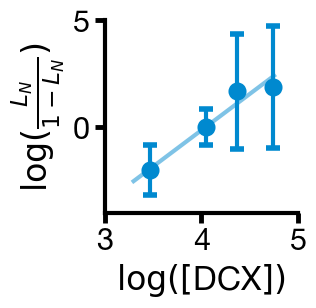

In [172]:
scattersize = 9
cap = 5

fig, ax = plt.subplots(1,1,figsize=(2.5,2.5))
ax.errorbar(logx , logyL , yerr= logyerrL , fmt='',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,color=cyan, alpha = 1, ls='')

x0 = np.arange(3.3, 4.8, 0.05)
ax.plot(x0, x0*mL+bL,color = cyan, lw=3,ls= '-',alpha = 0.5)

ax.set_ylim(-4,5)
ax.set_xlim(3,5)
ax.set_xlabel(r'$\log([$''DCX' r'$])$')
#ax.set_xticks(np.arange(0, 22.1, 2))
#ax.set_yticks(np.arange(0, 150.1, 25))
ax.set_ylabel(r'$\log(\frac{L_N}{1-L_N})$') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)

#ax.legend((r'$n=2.94 \pm 0.49$' '\n' r'$R^2 > 0.945$',),loc='lower right',title='Hill Equation')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

plt.savefig(newmydir/('logexpHillfit_Lifetime_'+date+'.pdf'), bbox_inches = 'tight')

#  PLOT DATA  #

In [24]:
data = ResultFit

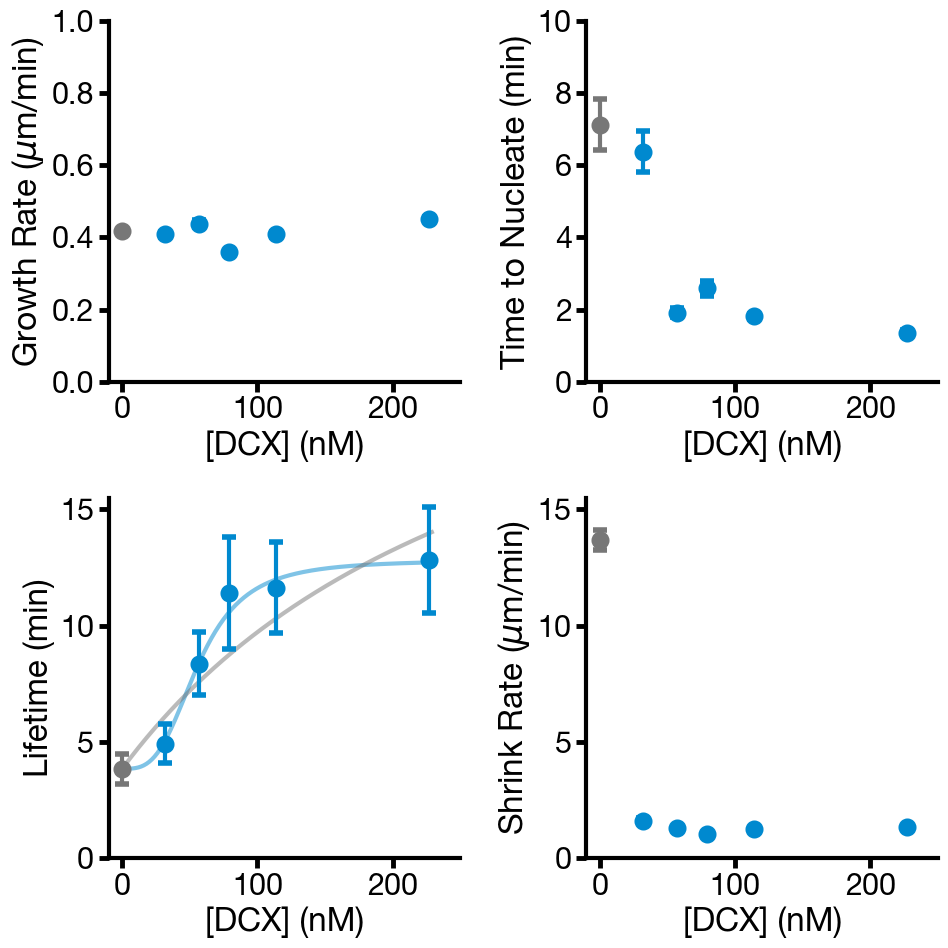

In [150]:
scattersize = 9
cap = 5

parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shrinkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

fig, ax = plt.subplots(2,2,figsize=(10,10))

linx = np.arange(0, 230, 1)

# ax[0][0].plot(linx, linx*mG+bG ,color = cyan, lw=3,ls= '-',alpha = 0.5,label='_nolegend_')
# ax[0][0].plot(linx, linx*mG76+bG76 ,color = '#e468b8', lw=3,ls= '-',alpha = 0.5,label='_nolegend_')
# ax[0][0].plot(linx, linx*mG191+bG191 ,color = '#ff8341', lw=3,ls= '-',alpha = 0.5,label='_nolegend_')

ax[1][0].plot(linx, hillEQ(linx,p[0], np.exp(-p[1])),color = cyan, lw=3,ls= '-',alpha = 0.5,label='_nolegend_')


# ax[1][0].plot(linx, michaelis_menten(linx, coeffMM[0], coeffMM[1]),color = grey, lw=3,ls= '-',alpha = 0.5,label='_nolegend_')
ax[1][0].plot(linx, michaelis_menten(linx, coeffMM2[0], coeffMM2[1]),color = grey, lw=3,ls= '-',alpha = 0.5,label='_nolegend_')

# ax[1][0].plot(linx, hillEQ(linx,p76[0], np.exp(-p76[1]),YL76),color = pink, lw=3,ls= '-',alpha = 0.5,label='_nolegend_')
# ax[1][0].plot(linx, hillEQ(linx,p191[0], np.exp(-p191[1]),YL191),color = orange, lw=3,ls= '-',alpha = 0.5,label='_nolegend_')
#linx = np.arange(35, 230, 1)
# ax[1][0].plot(linx, linx*mL76+bL76 ,color = '#e468b8', lw=3,ls= '-',alpha = 0.5,label='_nolegend_')
# ax[1][0].plot(linx, linx*mL191+bL191 ,color = '#ff8341', lw=3,ls= '-',alpha = 0.5,label='_nolegend_')


#ax[1][0].plot(linx, michaelis_menten(linx,coeff76),color = grey, lw=3,ls= '-',alpha = 0.5)




count = 0

#palette = palette_all
# palette = [grey,list(map(Color.get_hex,DC1color))[1],list(map(Color.get_hex,DC2color))[1],cyan] #+ list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]
palette = [grey,cyan]

for dcxtype in ['None','WT']:#ResultFit[Type].unique(): #data[Type].unique(): #['None','R76S','P191R','WT']
    
    dcxtype_DF = ResultFit[(ResultFit[Type]==dcxtype) & (ResultFit['Moment']=='Mean')& (ResultFit[tubulin]==6)]
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
    
            parameterMeanDF = dcxtype_DF[dcxtype_DF['Parameter']==parameters[c]]

            x = parameterMeanDF[DCXconc].values
            y = parameterMeanDF['Fit'].values
            yerr = parameterMeanDF['SE'].values
            
            if dcxtype == 'None' or  dcxtype == 'WT':

                ax[i][j].errorbar(x , y , yerr= yerr , fmt=' ',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count], alpha = 1)
            
            else:
                ax[i][j].errorbar(x , y , yerr= yerr , fmt=' ',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count], alpha = 0.80)

            c += 1

    count += 1

ax[0][0].set_ylim(0,1)
ax[1][0].set_ylim(0,15.5)
ax[0][1].set_ylim(0,10)
ax[1][1].set_ylim(0,15.5)


# linx = np.arange(30, 230, 1)
# ax[1][1].plot(linx, linx*mS+bS,color = cyan, lw=3,ls= '-',alpha = 0.5)

count = 0
for i in np.arange(len(ax)):
    for j in np.arange(len(ax)):
    
          
        ax[i][j].set_xlim(-10,250)
        ax[i][j].set_xlabel(DCXconc)
        ax[i][j].set_xticks(np.arange(0, 251, 100))
        ax[i][j].set_ylabel(ylables[count])
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['left'].set_lw(3)
        ax[i][j].spines['bottom'].set_lw(3)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
        #ax[i][1].legend((Type_order),loc='upper right',title='DCX Type')
        #ax[i][j].set_title(titles[count])
        ax[i][j].margins(2)
        count += 1

#ax[0][0].legend((Type_order),loc='upper right',title='DCX Type')
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()

plt.savefig(newmydir/('dynamics_all-mutants'+date+'.pdf'))

In [7]:
from matplotlib.font_manager import findfont, FontProperties
font = findfont(FontProperties(family=['sans-serif']))
font

'C:\\Users\\Brouhard Lab\\anaconda3\\envs\\brouhardlab-env\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'

# Histogram #

In [126]:
def plot_hist(data, tubconc, dcxtype, dcxconc,color) :
    
    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)]
    fig, ax = plt.subplots(2,2,figsize=(10.25,10.25))
    
    n = len(selectdata.dropna().index)
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
            parameter = parameters[c]

            if parameter == GrowthRate :
                maxbin = 1.5
                binsize = 0.05
#             elif parameter == ShrinkageRate :
#                 maxbin = 25
#                 binsize = 0.5
            else:
                maxbin = 30
                binsize = 1

            ax[i][j].hist(selectdata[parameter], bins=np.arange(0, maxbin + binsize, binsize), 
                          density=True,histtype='stepfilled',color = color,alpha = 0.4);
            ax[i][j].set_xlabel(parameter)
            ax[i][j].set_ylabel('Probability Density')
            ax[i][j].set_xlim(0,maxbin)
            ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
            ax[0][0].set_xticks(np.arange(0, 1.6, 0.5))
            ax[i][j].spines['right'].set_visible(False)
            ax[i][j].spines['top'].set_visible(False)
            ax[i][j].spines['left'].set_lw(3)
            ax[i][j].spines['bottom'].set_lw(3)
            
            c += 1
    
    selectcoeff = ResultFit.dropna(subset=['Coefficient'])
    selectcoeff=selectcoeff[(selectcoeff[tubulin]==tubconc) & (selectcoeff[Type]==dcxtype) 
                            & (selectcoeff[DCXconc]==dcxconc)]
    
    x = np.arange(0, 1.5 + 0.025, 0.025)
    mu = selectcoeff[(selectcoeff['Parameter']==parameters[0]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    sig = selectcoeff[(selectcoeff['Parameter']==parameters[0]) & (selectcoeff['Coefficient']==1)]['Fit'].values
    ax[0][0].plot(x, gaussian(x, mu, sig),color = color, lw=4);
    
    x = np.arange(0, 30 + 0.5, 0.5)
    scale = selectcoeff[(selectcoeff['Parameter']==parameters[1]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    ax[0][1].plot(x, exponential(x, scale),color = color, lw=4);
    
    shape = selectcoeff[(selectcoeff['Parameter']==parameters[2]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    scale = selectcoeff[(selectcoeff['Parameter']==parameters[2]) & (selectcoeff['Coefficient']==1)]['Fit'].values
    ax[1][0].plot(x, gamma(x, shape, scale),color = color, lw=4);
            
    mu = selectcoeff[(selectcoeff['Parameter']==parameters[3]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    sig = selectcoeff[(selectcoeff['Parameter']==parameters[3]) & (selectcoeff['Coefficient']==1)]['Fit'].values
    ax[1][1].plot(x, gaussian(x, mu, sig),color = color, lw=4);
    
    legnd = str(dcxconc)+' nM'
    #ax[0][1].legend(('Fit',legnd),loc='upper right',title='DCX: '+dcxtype)
    #ax[1][0].legend(('Fit',legnd),loc='upper right',title='DCX: '+dcxtype)
    
    ax[0][0].set_ylim(0,6)
    ax[1][0].set_ylim(0,0.30)
    ax[1][0].set_yticks(np.arange(0, 0.301, 0.1))
    ax[0][1].set_ylim(0,0.6)
    ax[1][1].set_ylim(0,0.6)
    
    sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
    plt.tight_layout()
    
    plt.savefig(newmydir/('joint_graphsHIST-'+dcxtype+'-'+str(dcxconc)+'-'+date+'.pdf'))
    
    return print(n)

In [82]:
newmydir

WindowsPath('C:/Users/sofia/OneDrive - McGill University/EJCB2023/Sofia_EJCB_Figs/Data/2023-08-08_fitdata-final/Plots_2023-10-25')

In [71]:
grey00 = '#777777'
grey20 = '#C5C5C5'
cyan00 = '#0089CF'  
cyan20 = '#65CBFF'
pink00 = '#e468b8'
pink20 = '#FBB0E1'
orange00 = '#ff8341'
orange20 = '#FFC6A8'

553


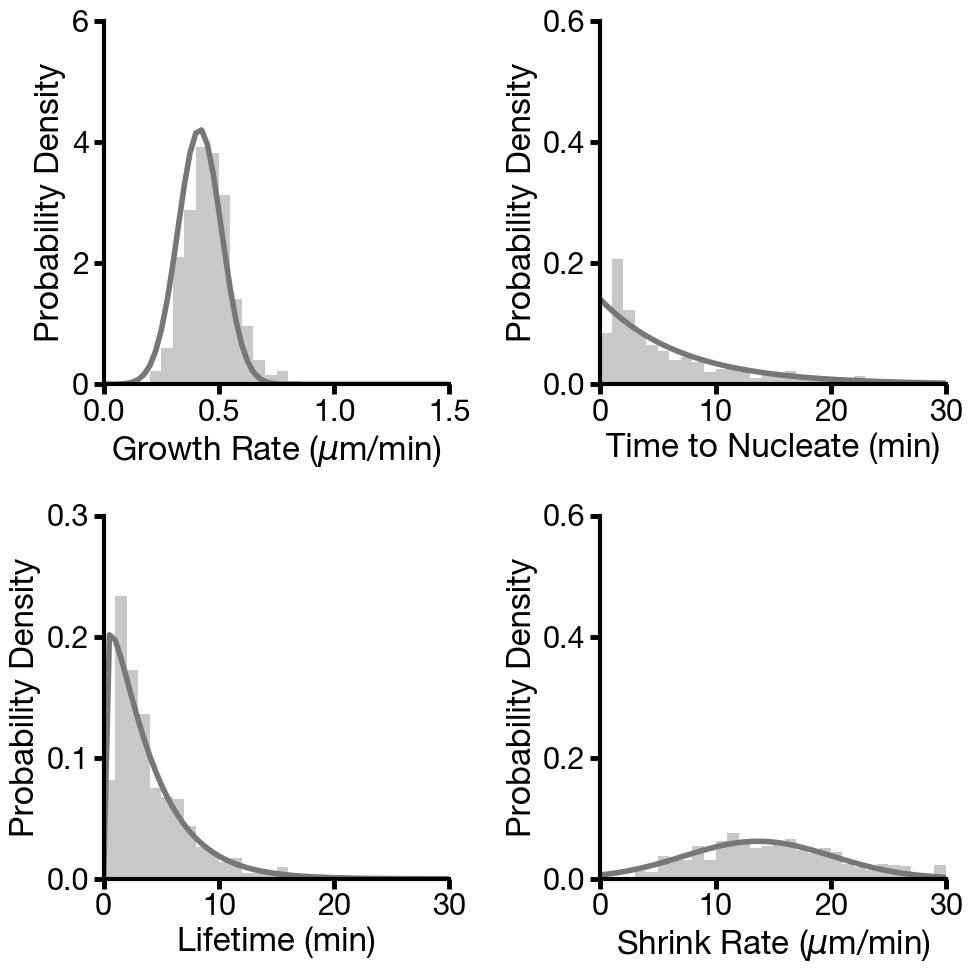

In [127]:
plot_hist(data, 6, 'None',0, grey00) #32,57,79,114,227 '#ff8341' orange ,'#e468b8' pink

223


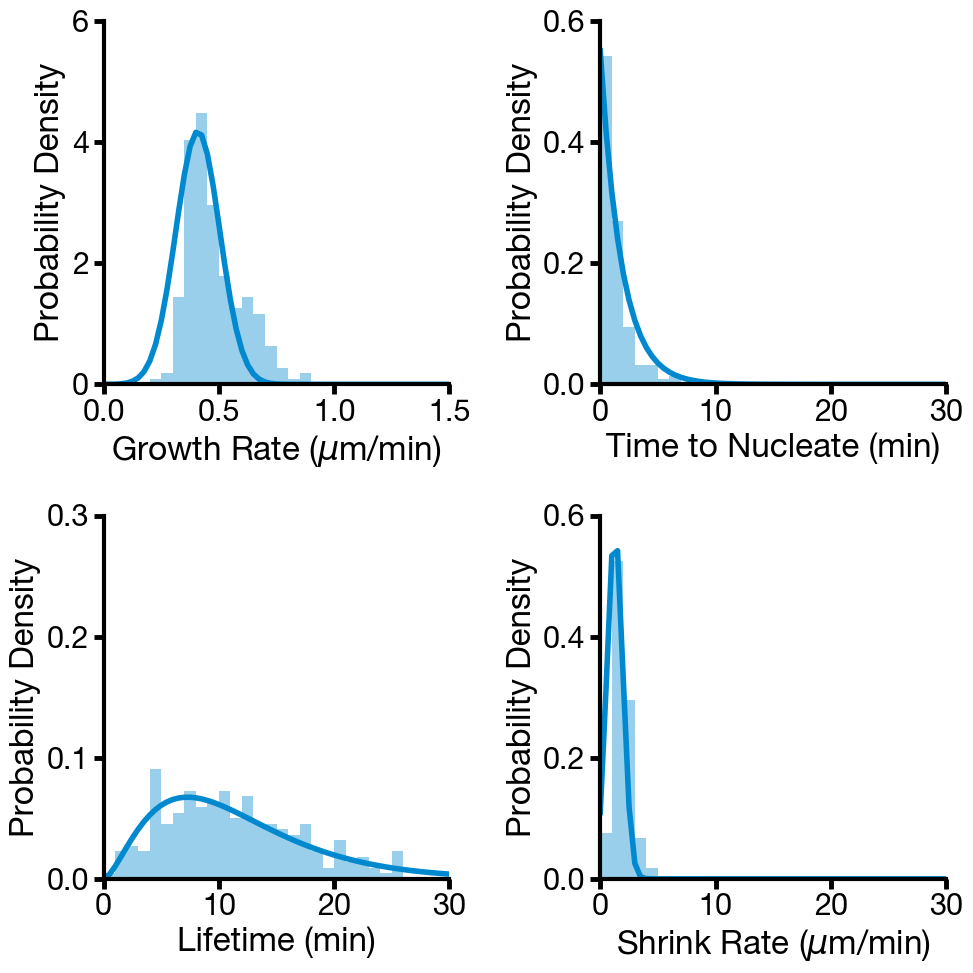

In [128]:
plot_hist(data, 6, 'WT', 114,cyan) 

295


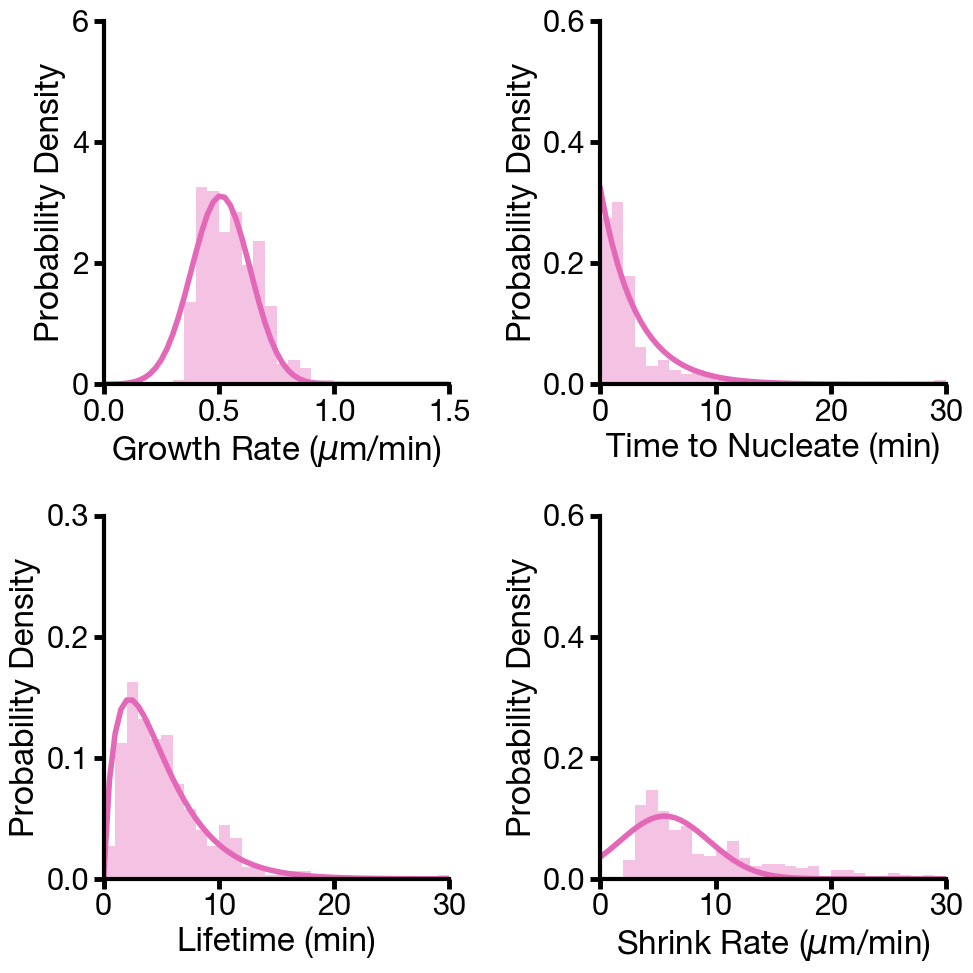

In [122]:
plot_hist(data, 6, 'R76S', 114,pink00)  #32,57,79,114

208


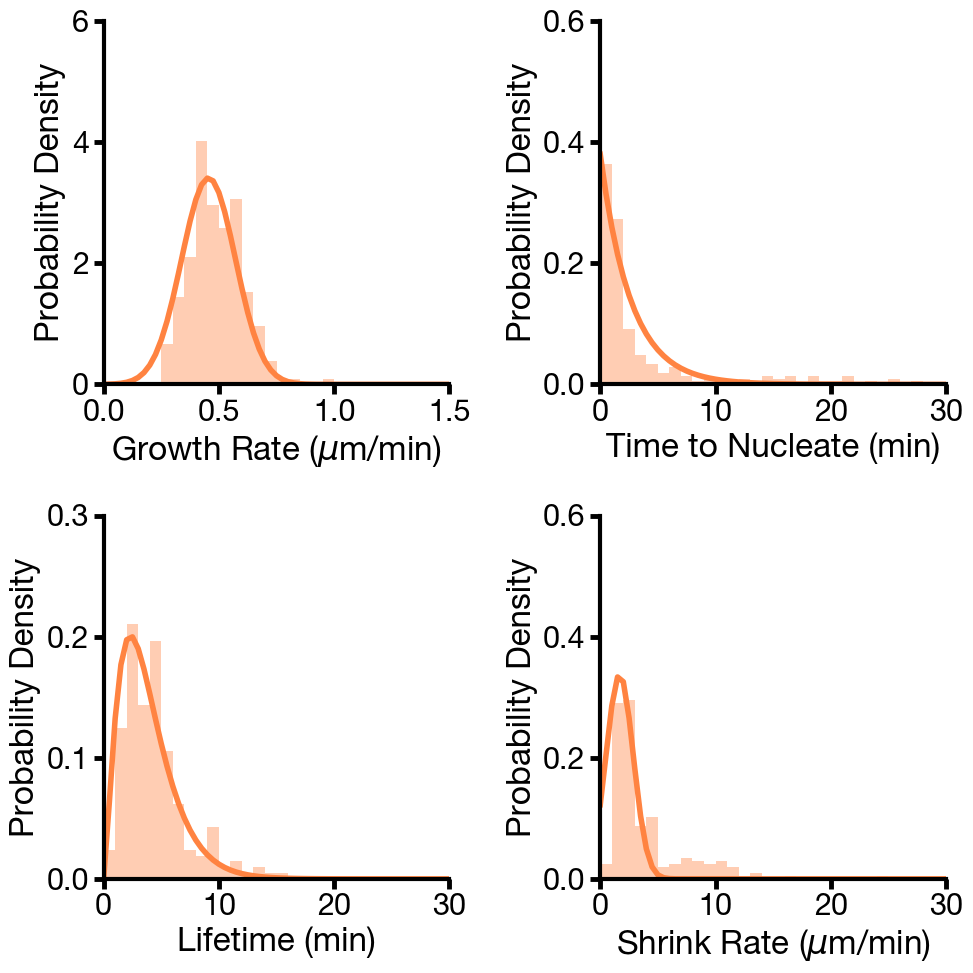

In [123]:
plot_hist(data, 6, 'P191R', 114,orange00) 

## Population tests ##

In [669]:
def stats_hist(data, tubconc, dcxtype, dcxconc, parameter) :
    
    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)]
    return selectdata[parameter]

In [670]:
x1 = stats_hist(data, 6, 'None', 0, GrowthRate)
x2 = stats_hist(data, 6, 'WT', 114, GrowthRate)
x3 = stats_hist(data, 6, 'R76S', 114, GrowthRate)
x4 = stats_hist(data, 6, 'P191R', 114, GrowthRate)
ztest(x1, x2, value=0)

(-3.002846917460517, 0.002674669337331631)

In [673]:
ztest(x1, x4, value=0)

(-4.670720250848675, 3.00145467205431e-06)

In [841]:
x3 = stats_hist(data, 6, 'R76S', 114, ShrinkageRate)
x4 = stats_hist(data, 6, 'P191R', 114, ShrinkageRate)
sp.stats.mannwhitneyu(x3,x4)

MannwhitneyuResult(statistic=9562.0, pvalue=8.007048878058066e-40)

## Reproducibility ##

In [28]:
tubconc = 6
dcxtype = 'R102S'
dcxconc = 227 #32  57  79  114  227
selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)]

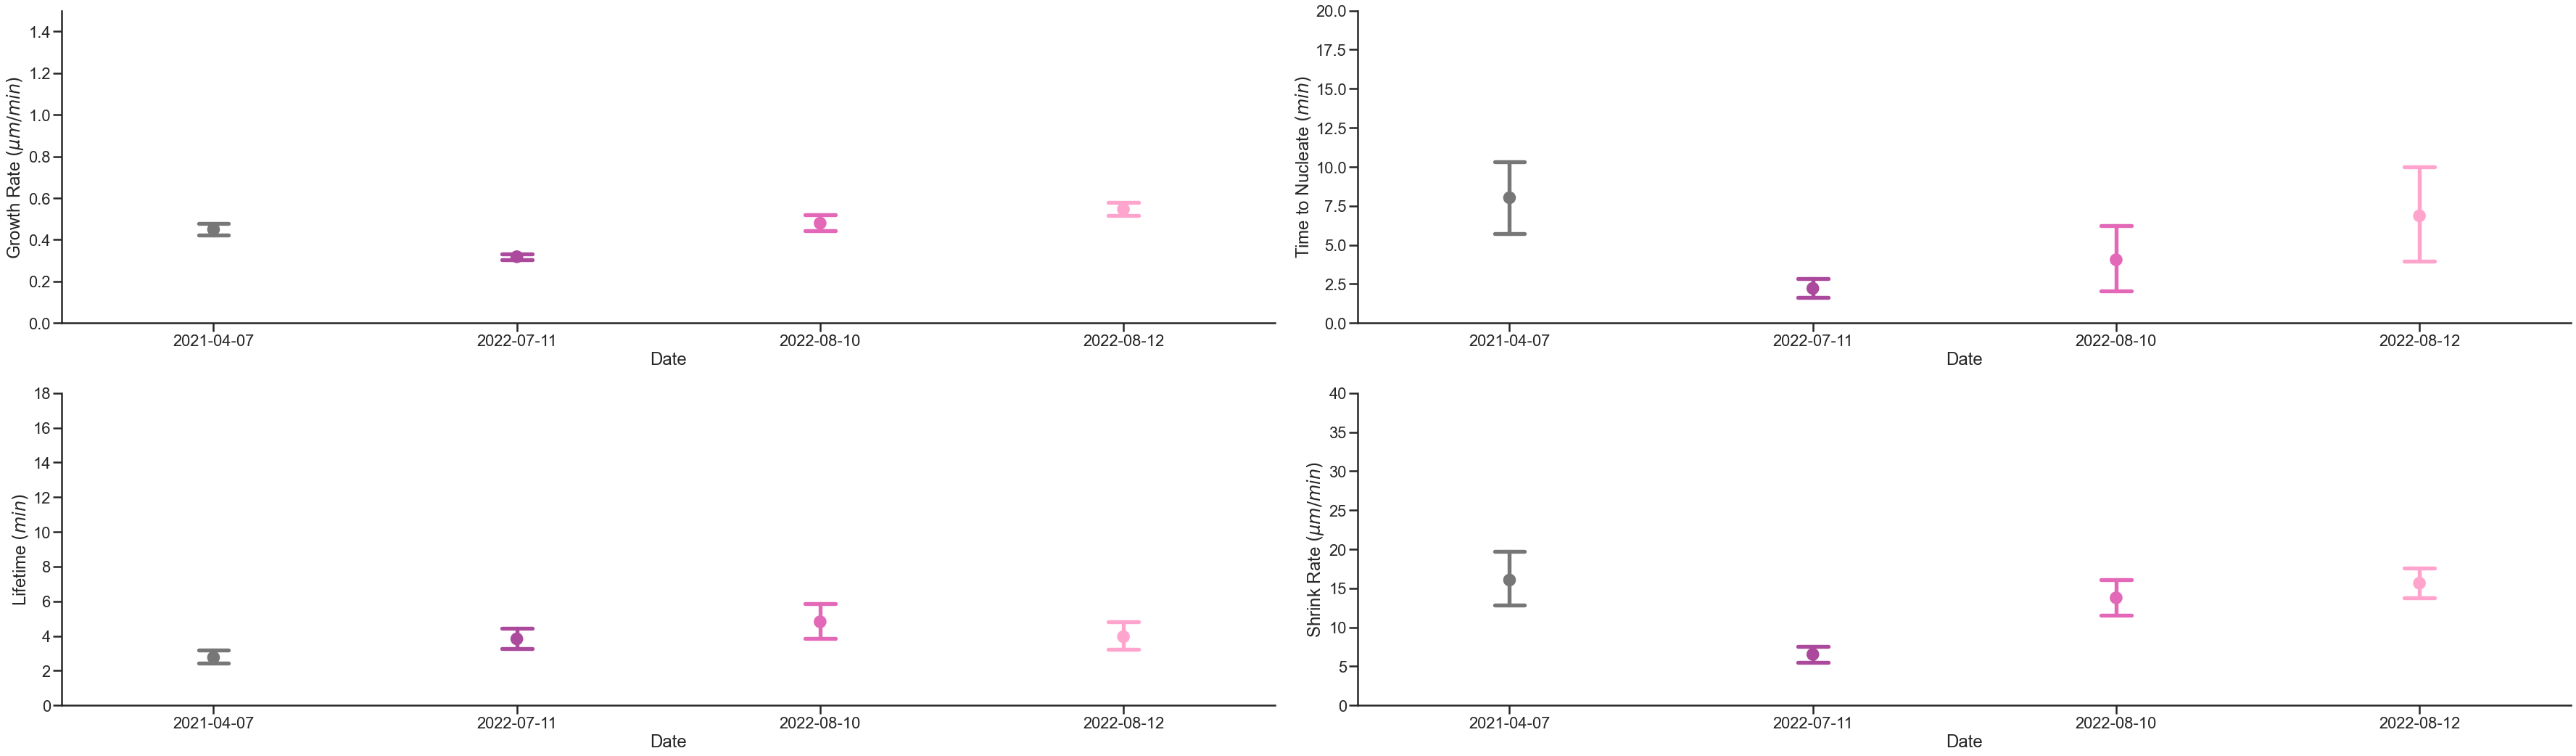

In [29]:
fig, axs = plt.subplots(2,2,figsize=(50,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x='Date', y=parameters[c],
                         err_style="bars", marker='o', join=False, capsize=.1,
                        data=selectdata,err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
axs[0][0].set_ylim(0,1.5)
axs[1][0].set_ylim(0,18)
axs[0][1].set_ylim(0,20)
axs[1][1].set_ylim(0,40)       
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()


# Rescues #

In [14]:
def rescue_count(data):
    
    results = pd.DataFrame(columns=[] , index=[])
    
    data.loc[pd.isnull(data[GrowthRate]), ['Rescues']] = np.NaN
    
    for tubconc in data[tubulin].unique():
        for dcxtype in data[Type].unique():
            for dcxconc in data[DCXconc].unique():

                    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)]
                    n = len(selectdata.dropna().index)

                    if n == 0:
                        continue
                        
                    rv = selectdata['Rescues'].dropna().value_counts(normalize = True).to_frame()
                    rescue_values = 1-rv.loc[0][0]

                    rvn = selectdata['Rescues'].dropna().value_counts(normalize = False).to_frame()
                    rescue_values_n = n-rvn.loc[0][0]

                    length = selectdata[ShrinkageLength].sum()
                    time = selectdata[ShrinkageLength].sum()
                    res_p_len = rescue_values_n/length
                    
                    SD = res_p_len / length * n * 0.107
                    
                

                #======Making a data frame========
                    r0 = {tubulin:[tubconc], Type:[dcxtype], DCXconc:[dcxconc], 'Normalized Rescue': [rescue_values],
                         'Rescue Number': [rescue_values_n],'n': [n],ShrinkageLength: [length],RescuePerLength: [res_p_len] ,'SD': [SD]}
                    results0 = pd.DataFrame(data=r0)
                    results = pd.concat([results, results0], sort=False)

    return results

In [15]:
selectdata = data[(data[tubulin]==6)&(data[Type]=='WT')&(data[DCXconc]==32)]
selectdata[ShrinkageLength].sum()

575.6829036865809

In [16]:
newmydir

WindowsPath('C:/Users/sofia/OneDrive - McGill University/EJCB2023/Sofia_EJCB_Figs/Data/Plots')

In [17]:
rescues = rescue_count(data.dropna())
#rescues.to_csv(newmydir/('Rescues_'+date+'.csv'), encoding='utf-8', index=False)
rescues

C:\Users\sofia\AppData\Local\Temp\ipykernel_30204\1587090510.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data.loc[pd.isnull(data[GrowthRate]), ['Rescues']] = np.NaN
C:\Users\sofia\AppData\Local\Temp\ipykernel_30204\1587090510.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rescue_values = 1-rv.loc[0][0]
C:\Users\sofia\AppData\Local\Temp\ipykernel_30204\1587090510.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rescue_values_n = n-rvn.loc

,[Tubulin] ($\mu$M),DCX Type,[DCX] (nM),Normalized Rescue,Rescue Number,n,Shrink Length ($\mu$m),Rescues ($\mu$m$^{-1}$),SD
0,12,None,0,0.047619,5,105,972.805151,0.005140,0.000059
0,8,None,0,0.034483,1,29,134.927000,0.007411,0.000170
0,6,None,0,0.010850,6,553,1210.078602,0.004958,0.000242
0,6,Y64N,32,0.000000,0,206,464.981364,0.000000,0.000000
0,6,Y64N,57,0.034615,9,260,566.093678,0.015898,0.000781
0,6,Y64N,79,0.075163,23,306,789.490326,0.029133,0.001208
0,6,Y64N,114,0.247826,57,230,574.086040,0.099288,0.004256
0,6,Y64N,227,0.868932,179,206,487.237800,0.367377,0.016620
0,6,R76S,32,0.004444,1,225,555.903854,0.001799,0.000078
0,6,R76S,57,0.006410,2,312,738.677589,0.002708,0.000122


## Open rescues ##

In [31]:
askFitParam = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
rescues = pd.read_csv(askFitParam, encoding='utf-8',keep_default_na=False)
rescues

,[Tubulin] ($\mu$M),DCX Type,[DCX] (nM),Normalized Rescue,Rescue Number,n,Shrink Length ($\mu$m),Rescues ($\mu$m$^{-1}$)
0,12,None,0,0.047619,5,105,972.805151,0.005140
1,8,None,0,0.034483,1,29,134.927000,0.007411
2,6,None,0,0.010850,6,553,1210.078602,0.004958
3,6,Y64N,32,0.000000,0,206,464.981364,0.000000
4,6,Y64N,57,0.034615,9,260,566.093678,0.015898
5,6,Y64N,79,0.075163,23,306,789.490326,0.029133
6,6,Y64N,114,0.247826,57,230,574.086040,0.099288
7,6,Y64N,227,0.868932,179,206,487.237800,0.367377
8,6,R76S,32,0.004444,1,225,555.903854,0.001799
9,6,R76S,57,0.006410,2,312,738.677589,0.002708


In [32]:
resultdirectory = str(Path(askFitParam).parent)+'//Plots_'+date
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('C:/Users/sofia/OneDrive - McGill University/EJCB2023/Sofia_EJCB_Figs/Data/2023-08-08_fitdata-final/Plots_2024-02-23')

## Fit ##

In [33]:
x = rescues[ (rescues[tubulin]==6) & (rescues[Type]== 'WT')][DCXconc]
y = rescues[ (rescues[tubulin]==6) & (rescues[Type]== 'WT')][RescuePerLength]
x0 = rescues[ (rescues[tubulin]==6) & (rescues[Type]== 'None')][DCXconc]
y0 = rescues[ (rescues[tubulin]==6) & (rescues[Type]== 'None')][RescuePerLength]
X = [*x0,*x]
YR = [*y0,*y]

# def hillEQ2(x, n, kd):
#     return np.power(x, n)/(kd + np.power(x, n)) 
# def MMEQ2(x, kd):
#     return np.power(x, 1)/(kd + np.power(x, 1)) 

# coeff, var_matrix = sp.optimize.curve_fit(hillEQ2,X,YR)

# variance = np.diagonal(var_matrix) #Refer [3]
# SE = np.sqrt(variance)

# C1R,C2R = coeff
# coeff,SE

In [34]:
def hillEQ2(x, n, kd):
    return (YR[-1]- YR[0]) * np.power(x, n)/(kd + np.power(x, n)) + YR[0]

In [11]:
coeff, var_matrix = sp.optimize.curve_fit(hillEQ2,X,YR)
C1R,C2R = coeff
coeff,SE

NameError: name 'SE' is not defined

In [ ]:
### X = np.array(X)
R2S(YR,hillEQ2(X,C1R, C2R))

In [12]:
X = np.array(X)
R2S(YR,MMEQ2(X,coeffMMR))

NameError: name 'MMEQ2' is not defined

In [13]:
x = rescues[ (rescues[tubulin]==6) & (rescues[Type]== 'P191R')][DCXconc]
y = rescues[ (rescues[tubulin]==6) & (rescues[Type]== 'P191R')][RescuePerLength]

XR191 = np.array(x[1:])
YR191 = np.array(y[1:])


p, cov = np.polyfit(XR191,YR191, 1, cov=True)
var = np.diagonal(cov) #Refer [3]
SElin = np.sqrt(var) #Refer [4]
mR191,bR191=p
R2R191 = R2S(YR191,XR191*mR191+bR191)
R2R191

0.9773441700104697

## Plot ##

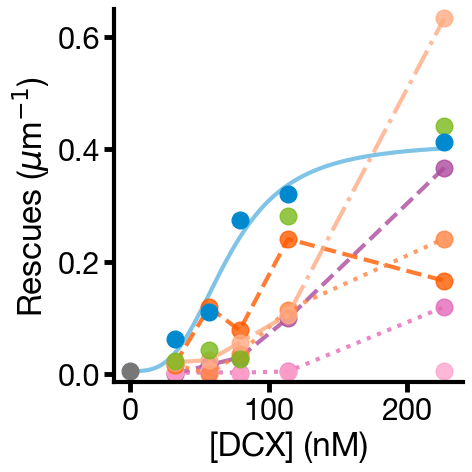

In [19]:
scattersize = 12
cap = 5
linetype = ['','--', ':', '','--', ':', '-.','','']

fig, ax = plt.subplots(1,1,figsize=(5.25,5.25))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
#palette = [grey,list(map(Color.get_hex,DC1color))[1],list(map(Color.get_hex,DC2color))[1],cyan] #+ list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]
#palette = [grey,cyan]
palette = palette_all

linx = np.arange(0, 230, 1)
ax.plot(linx, hillEQ2(linx,C1R, C2R),color = cyan, lw=3,ls= '-',alpha = 0.5)
# linx = np.arange(57, 230, 1)
# ax.plot(linx, linx*mR191+bR191, C2R,color = list(map(Color.get_hex,DC2color))[1], lw=3,ls= '-',alpha = 0.5)

for dcxtype in rescues[Type].unique():#['None','WT']: #data[Type].unique(): #['None','R76S','P191R','WT']

    x = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)][DCXconc]

    y = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)][RescuePerLength]
    
    if dcxtype == 'None' or  dcxtype == 'WT':

        ax.plot(x , y ,color=palette[count],marker = 'o', ms=scattersize, ls=' ')
    
    else:
        
        ax.plot(x , y ,color=palette[count],marker = 'o', ms=scattersize, ls=linetype[count],alpha=0.8)

    count += 1



ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
ax.set_ylim(-0.015,0.65)
ax.set_yticks(np.arange(0, 0.61, 0.2))
#ax.set_xlim(-10,250)
ax.set_xticks(np.arange(0, 251, 100))
ax.set_xlabel(DCXconc)


#ax.set_title('Rescue')
ax.set_ylabel(RescuePerLength)

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
#ax.legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')

#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsRescues_all-mutants'+date+'.pdf'))

In [35]:
X = np.array(X)
YR = np.array(YR)
logx = np.log(X[1:-1])
normyR =( YR[1:-1]-YR[0])/(YR[-1]-YR[0])
logyR = np.log(normyR/(1-normyR))

p, cov = np.polyfit(logx, logyR, 1, cov=True)
var = np.diagonal(cov) #Refer [3]
SElin = np.sqrt(var) #Refer [4]

mR,bR = p
p, SElin

(array([  2.54184115, -10.80112988]), array([0.50557431, 2.11317421]))

In [36]:
R2S(logyR,logx*mR+bR)

0.9266783547729758

In [38]:
K_A(p)

(70.05867871590753, 83.05746506459032)

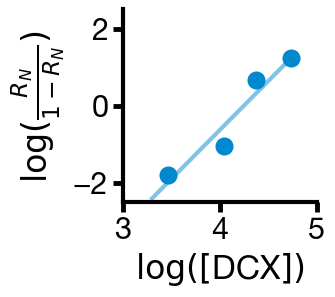

In [131]:
scattersize = 9
cap = 5

fig, ax = plt.subplots(1,1,figsize=(2.5,2.5))
ax.errorbar(logx , logyR , yerr= 0 , fmt='',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,color=cyan, alpha = 1, ls='')

x0 = np.arange(3.3, 4.8, 0.05)
ax.plot(x0, x0*mR+bR,color = cyan, lw=3,ls= '-',alpha = 0.5)

ax.set_ylim(-2.5,2.5)
ax.set_xlim(3,5)
ax.set_xlabel(r'$\log([$''DCX' r'$])$')
#ax.set_xticks(np.arange(0, 22.1, 2))
#ax.set_yticks(np.arange(0, 150.1, 25))
ax.set_ylabel(r'$\log(\frac{R_N}{1-R_N})$') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)

#ax.legend((r'$n=2.94 \pm 0.49$' '\n' r'$R^2 > 0.945$',),loc='lower right',title='Hill Equation')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

plt.savefig(newmydir/('logexpHillfit_Rescues_'+date+'.pdf'), bbox_inches = 'tight')

In [2]:
scattersize = 12
cap = 5

fig, ax = plt.subplots(1,1,figsize=(5.5,5.5))
#     plt.suptitle('Fitted pooled data', fontsize=30)

#linx = np.arange(0, 230, 1)
#ax.plot(linx, hillEQ2(linx,C1R, C2R),color = cyan, lw=3,ls= '-',alpha = 0.5)
#ax.plot(linx, MMEQ2(linx,coeffMMR),color = grey, lw=3,ls= '-',alpha = 0.5)  

count = 0
#palette = [grey,list(map(Color.get_hex,DC1color))[1],list(map(Color.get_hex,DC2color))[1],cyan] #+ list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]
#palette = [grey,cyan]
palette = palette_all
linx = np.arange(55, 230, 1)
#ax.plot(linx, linx*mR191+bR191 ,color = '#ff8341', lw=3,ls= '-',alpha = 0.5)

for dcxtype in data[Type].unique():#['None','WT']: #data[Type].unique(): #['None','R76S','P191R','WT']

    x = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)][DCXconc]

    y = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)][ShrinkageLength]
    
    if dcxtype == 'None' or  dcxtype == 'WT':

        ax.plot(x , y ,color=palette[count],marker = 'o', ms=scattersize, ls='-')
    
    else:
        
        ax.plot(x , y ,color=palette[count],marker = 'o', ms=scattersize, ls='--',alpha=0.8)

    count += 1



ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
ax.set_ylim(-0.015,)
ax.set_xlim(-10,250)
ax.set_xticks(np.arange(0, 251, 100))
ax.set_xlabel(DCXconc)


#ax.set_title('Rescue')
ax.set_ylabel(ShrinkageLength)

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
#ax.legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')
plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
#plt.savefig(newmydir/('joint_graphsRescues_WT-2mutants'+date+'.svg'),backend='Cairo')

NameError: name 'plt' is not defined

In [90]:
YR = np.array(YR)

In [3]:
logx = np.log(X[1:])
normy =YR[1:]
logy = np.log(normy/(1-normy))

p, cov = np.polyfit(logx, logy, 1, cov=True)
var = np.diagonal(cov) #Refer [3]
SElin = np.sqrt(var) #Refer [4]

m,b = p

p, SElin

NameError: name 'np' is not defined

In [92]:
R2S(logy,logx*m+b)

0.9599075562335437

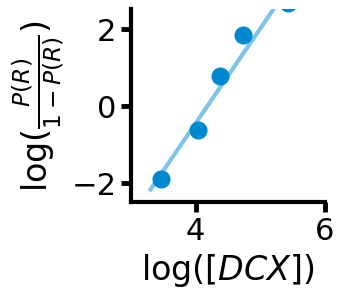

In [93]:
scattersize = 9
cap = 5
fig, ax = plt.subplots(1,1,figsize=(2.5,2.5))
ax.errorbar(logx , logy , yerr= 0 , fmt='',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,color=cyan, alpha = 1, ls='')

x0 = np.arange(3.3, 5.4, 0.05)
ax.plot(x0, x0*m+b,color = cyan, lw=3,ls= '-',alpha = 0.5)

ax.set_ylim(-2.5,2.5)
ax.set_xlim(3,6)
ax.set_xlabel(r'$\log([DCX])$')
#ax.set_xticks(np.arange(0, 22.1, 2))
#ax.set_yticks(np.arange(0, 150.1, 25))
ax.set_ylabel(r'$\log(\frac{P(R)}{1-P(R)})$') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)

#ax.legend((r'$n=2.46 \pm 0.29$' '\n' r'$R^2 > 0.959$',),loc='lower right',title='Hill Equation')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

plt.savefig(newmydir/('logexpHillfit_Rescues_'+date+'.svg'))

# Lifetime Parameters #

In [39]:
dcxtype_DF = ResultFit[(ResultFit[Type]=='WT') & (ResultFit['Parameter']==Lifetime)
                           & (ResultFit[tubulin]==6)].dropna(subset=['Coefficient'])

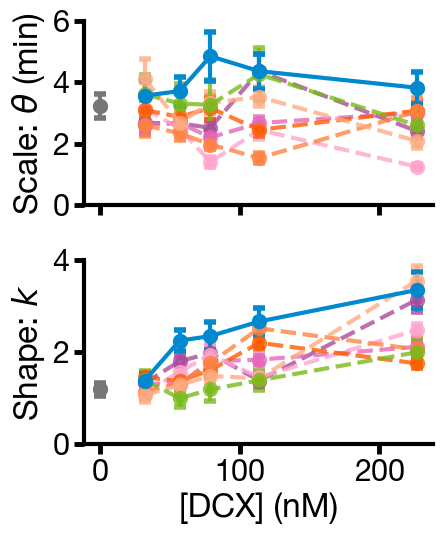

In [44]:
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shronkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

scattersize = 7
cap = 4

fig, ax = plt.subplots(2,1,figsize=(4.5,5.5),sharex=True)
fig.subplots_adjust(hspace=0.3)
#     plt.suptitle('Fitted pooled data', fontsize=30)
#selectcoeff = ResultFit.dropna(subset=['Coefficient'])

count = 0

#palette = [grey,list(map(Color.get_hex,DC1color))[1],list(map(Color.get_hex,DC2color))[1],cyan]
#[grey,cyan] #+ list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]
palette = palette_all

for dcxtype in ResultFit[Type].unique():#data[Type].unique(): #['None','R76S','P191R','WT']: #
    
    dcxtype_DF = ResultFit[(ResultFit[Type]==dcxtype) & (ResultFit['Parameter']==Lifetime)
                           & (ResultFit[tubulin]==6)].dropna(subset=['Coefficient'])

    x = dcxtype_DF[(dcxtype_DF['Coefficient']==0)][DCXconc].values
    
    y = dcxtype_DF[(dcxtype_DF['Coefficient']==0)]['Fit'].values
    yerr = dcxtype_DF[(dcxtype_DF['Coefficient']==0)]['SE'].values

    if dcxtype == 'None' or  dcxtype == 'WT':

        ax[1].errorbar(x , y , yerr= yerr , fmt='',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count], alpha = 1)
            
    else:
        ax[1].errorbar(x , y , yerr= yerr , fmt='--',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count], alpha = 0.80)
    
    y = dcxtype_DF[(dcxtype_DF['Coefficient']==1)]['Fit'].values
    yerr = dcxtype_DF[(dcxtype_DF['Coefficient']==1)]['SE'].values

    if dcxtype == 'None' or  dcxtype == 'WT':

        ax[0].errorbar(x , y , yerr= yerr , fmt='',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count], alpha = 1)
            
    else:
        ax[0].errorbar(x , y , yerr= yerr , fmt='--',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count], alpha = 0.80)
    
    count += 1

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_lw(3)
    ax[i].spines['bottom'].set_lw(3)
    ax[i].tick_params(axis='both', width = 3.5, length = 7)
    
    ax[i].set_xticks(np.arange(0, 251, 100))
    

ax[1].set_ylim(0,4)    
ax[1].set_yticks(np.arange(0, 4.1, 2))

ax[0].set_ylim(0,6)    
ax[0].set_yticks(np.arange(0, 6.1, 2))


ax[1].set_xlabel( DCXconc)
ax[1].set_ylabel( 'Shape: ' r'$k$')

ax[0].set_ylabel( 'Scale: ' r'$\theta$'' (min)')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
#plt.tight_layout()
#ax[0].legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')

#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
#plt.savefig(newmydir/('joint_graphsFit_lifetimeparms_all-mutants.pdf'),bbox_inches='tight')

In [643]:
[grey,list(map(Color.get_hex,DC1color))[1],list(map(Color.get_hex,DC2color))[1],cyan]

['#777777', '#e468b8', '#ff8341', '#0089CF']

In [658]:
newmydir

WindowsPath('D:/Sofia/Data_Sheets_summer/Plots/2023-02-21_fitdata')

In [188]:
y

array([], dtype=float64)